In [2]:
from matplotlib import pyplot as plt
import numpy as np 
from random import random
import math
import random as rand

problem1_network_2_lines = [
    [{'weights': [-2.0, 1.0, -6.0] },
     {'weights': [-2.0, 1.0, -5.0]}, 
     {'weights': [2.0, 1.0, -6.0]},
     {'weights': [2.0, 1.0, -5.0]}], 
                                 [{'weights': [-1.0, 1.0, -1.0, 0.0, -2.0]},
                                 {'weights': [-1.0, 0.0, -1.0, 1.0, -2.0]}], [{'weights': [1.0, 1.0, 0.0]}]]   

problem1_network_1_line = [[{'weights': [3.0, 1.0, -3.0]},{'weights': [-3.0, 1.0, -2.5]}],[{'weights': [-1.0, 1.0, -1.0]}]]  
problem1_network_2_line = [[{'weights': [3.0, 1.0, -3.0]},{'weights': [3.0, 1.0, -2.5]}],[{'weights': [-1.0, 1.0, -1.0]}]] 
problem1_network_3_line = [
    [{'weights': [0.0, 1.0, 1.0]},
     {'weights': [0.0, 1.0, 1.5]}],[{'weights': [-1.0, 1.0, -1.0]}]]  
            

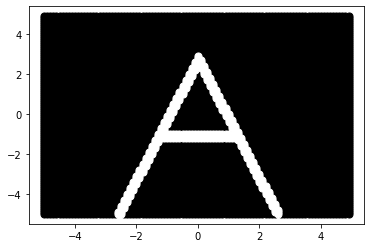

In [4]:
x_value = 5.0
x_neg_value = -5.0
y_value = 5.0
y_neg_value = -5.0
x = np.arange(x_neg_value, x_value, 0.1)
y = np.arange(y_neg_value, y_value, 0.1)


problem1_network = [
    [{'weights': [-3.0, 1.0, -3.0] },
     {'weights': [-3.0, 1.0, -2.5]}, 
     {'weights': [3.0, 1.0, -3.0]},
     {'weights': [3.0, 1.0, -2.5]}, 
     {'weights': [0.0, 1.0, 1.0]},
    {'weights': [0.0, 1.0, 1.25]},
    {'weights': [1.0, 0.0, 1.39]},
    {'weights': [1.0, 0.0, x_value]},
    {'weights': [1.0, 0.0, -1.39]},
    {'weights': [1.0, 0.0, x_neg_value]},
    {'weights': [0.0, 1.0, y_neg_value]},
    {'weights': [0.0, 1.0, -2.75]}], [{'weights': [-2.0,2.0, -2.0, 2.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 2.0,-2.0, -1.0]}]]    


    # [-2.0,2.0, -2.0, 2.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0,-3.0, -1.0]
    # [-2.0,2.0, -2.0, 2.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 3.0,-3.0, -1.0]

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)


# problem1_network_1_line = [[{'weights': [-3.0, 1.0, -2.5]}],[{'weights': [1.0, 0.0]}]]  


xx, yy = np.meshgrid(x, y)

# print(predict_problem1(problem1_network, [0,-1.25], activation_func = "Signum"))
class1_data=[[],[]]
class0_data=[[],[]]

for row,col in zip(xx,yy):
    for x_val,y_val in zip(row,col):
        z = predict_problem1(problem1_network, [x_val,y_val], activation_func = "Signum")
        if z==1:
            class1_data[0].append(x_val)
            class1_data[1].append(y_val)
        else:
            class0_data[0].append(x_val)
            class0_data[1].append(y_val)

        
plt.scatter(class0_data[0],class0_data[1],marker = '.',s=200.0,c='k',label='Class 0')
plt.scatter(class1_data[0],class1_data[1],marker = '.',s=200.0,c='w',label='Class 1')


plt.show()

In [41]:
predict_problem1(problem1_network,[0,0],activation_func = "Signum")

1

In [3]:
y = []

# for layer in problem1_network:
#     for idx,node in enumerate(layer):
#         weights = node['weights']
#         # print(weights)
#         m = (weights[0]/weights[1])
#         b_divided_by_w = weights[-1]/weights[1]
#         # print(m)
#         # print(b_divided_by_w)
#         y_value = -(m*x_axis + b_divided_by_w)
#         # plt.plot(x_axis, y_value, '-g')
#     break
def plotting(matrix, network=None, title="Plot"):

    fig,ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")

    if network:
        x_min=-1.5
        x_max=1.5
        y_res=0.01
        x_res=0.01

        ys=np.arange(x_min,x_max,y_res)
        xs=np.arange(x_min,x_max,x_res)

        zs=[]

        for rand_y in np.arange(x_min,x_max,y_res):
            for rand_x in np.arange(x_min,x_max,x_res):
                zs.append(predict(network,[rand_x,rand_y,1]))

        xs,ys = np.meshgrid(xs,ys)
        zs = np.array(zs)
        zs = zs.reshape(xs.shape)

        plt.contourf(xs,ys,zs,levels=[-1,0,1],colors=('b','r'),alpha=0.3)

    class1_data=[[],[]]
    class0_data=[[],[]]

    for i in range(len(matrix)):
        i1_rand = matrix[i][0]
        i2_rand = matrix[i][1]
        y_rand  = matrix[i][-1]

        if y_rand==1:
            class1_data[0].append(i1_rand)
            class1_data[1].append(i2_rand)
        else:
            class0_data[0].append(i1_rand)
            class0_data[1].append(i2_rand)

    plt.xticks(np.arange(-1.5,1.5,0.5))
    plt.yticks(np.arange(-1.5,1.5,0.5))
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

    plt.scatter(class0_data[0],class0_data[1],s=40.0,c='r',label='Class 0')
    plt.scatter(class1_data[0],class1_data[1],s=40.0,c='b',label='Class 1')

    plt.legend(fontsize=10,loc=1)
    plt.show()
    return

def create_network(n_inputs, layers_hidden, hidden_neurons: list, n_output):
    # The list input for hidden neurons is in case there is more than one hidden layers.
    network= list()
    for i in range(layers_hidden):
        layer =[]
        for j in range(hidden_neurons[i]):
            layer.append({"weights":[random() for j in range(n_inputs+1)]})
        network.append(layer)
    
    layer =[]

    for j in range(n_output):
        layer.append({"weights":[random() for j in range(hidden_neurons[-1]+1)]})
    network.append(layer)
    return network

def training(network, matrix, epochs, learning_rate, n_output, error_plot = False, node_number_hidden_layer = 4):
    # The network should be a list of weights of different layers with appropriate number of layers and neurons in the layers.
    # Example a network with 2 input nodes (with 1 bias), 1 hidden layer with 2 nodes (with 1 bias) and one 1 node will look like:
    # [[{'weights': [0.16696199275834855, 0.9074274294852825, 0.7977612543253025]}, {'weights': [0.8403945031023915, 0.3699665961711708, 0.41002603124474046]}], [{'weights': [0.06221525252990556, 0.8261995420912167, 0.017695313965993886]}]]

    if(error_plot):
        f1 = plt.figure(1)
        ax1 = f1.add_subplot(111)
    error_plot_values = []
    for epoch in range(epochs):
        sum_error = 0
        for data_row in matrix:
            final_output = forward_propagate(network, data_row, activation_func = "Sigmoid")
            true_value = []
            for i in range(n_output):
                true_value.append(0)
            true_value[data_row[-1]] = 1
            for i in range(len(true_value)):
                sum_error += sum([(true_value[i]-final_output[i])**2 ])
            backprop(network,true_value)
            update_paramters(network, data_row, learning_rate)
        error_plot_values.append(sum_error)
        
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
        
    if(error_plot):
        Title_str = "Training Error with " +  str(node_number_hidden_layer) + " nodes"
        learning_rate_str = "Learning rate: " + str(learning_rate)
        epoch_plot_values = [i for i in range(1,epochs+1)]
        ax1.plot(epoch_plot_values,error_plot_values, '-b', label = 'Error')
        # plt.yticks(np.arange(min(error_plot_values), max(error_plot_values)+1, 0.5))
        # plt.yticks(np.arange(min(error_plot_values),6, 0.1))
        ax1.set_title(Title_str)
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Error")
        plt.figtext(0.77,0.7, learning_rate_str, ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
        plt.legend()
        plt.show()
    return network
    
    
def forward_propagate(network,data,activation_func = "Sigmoid"):
    # This function handles the complete forward propagation of network for one set of data points.
    
    # data = data[:-1]
    # print(data)
    for layer in network:
        layer_output = []
        for node in layer:
            # print(node)
            node_output = single_forward_pass(node['weights'],data,activation_func)
            node['Output'] = node_output
            
            layer_output.append(node_output)
        data = layer_output
        # print("Output of ", layer)
    # print("Final output", data)

    return data

def single_forward_pass(node,data,activation_func):
    
    # This function is to calculate final output of a single neuron
    weighted_sum = node[-1]
    for w,x in zip(node[:-1],data):
        # print("w = {} and x = {}" .format(w,x))
        weighted_sum += w*x
    # if(activation_func == "Sigmoid"):
        
    #     layer_output = sigmoid_activation_function(weighted_sum)
    # elif(activation_func == "Signum"):
    #     print("signum")
    layer_output = signum_activation_function(weighted_sum)
    # print(layer_output)
    return layer_output
    
    

def backprop(network, true_value):
    depth = len(network)
    for i in reversed(range(depth)):
        layer = network[i]
        layer_len = len(layer)
        update_term = []
        if i<depth-1:
            # Delta for the hidden layers
            for j in range(layer_len):
                error = 0
                for next_layer_node in network[i+1]:
                    error += next_layer_node['update_term'] * next_layer_node['weights'][j]
                update_term.append(error * derivative_for_sigmoid(layer[j]['Output']))
        else:
            # Delta for the last layer
            for j in range(layer_len):
                error = true_value[j] - layer[j]['Output']
                update_term.append(error * derivative_for_sigmoid(layer[j]['Output']))
        for k in range(layer_len):
            layer[k]['update_term'] = update_term[k]

def update_paramters(network, input_data, learning_rate):
    for idx,layer in enumerate(network):
        input_to_the_layer = input_data
        if idx!=0:
            input_to_the_layer = [node["Output"] for node in network[idx-1]]
        for node in layer:
            for j in range(len(input_to_the_layer)):
                node['weights'][j] += learning_rate * node['update_term'] * input_to_the_layer[j]
            # For the bias term
            node['weights'][-1] += learning_rate * node['update_term']
    return network

def derivative_for_sigmoid(layer_output):
    return layer_output * (1.0 - layer_output)

def signum_activation_function(weighted_sum):
    if weighted_sum>=0:
        return 1.0
    elif weighted_sum<0:
        return 0.0  
    

def sigmoid_activation_function(weighted_sum):
    return 1.0 / (1.0 + math.exp(-weighted_sum))

def predict(network, input_data,activation_func = "Sigmoid"):
    output_val = forward_propagate(network, input_data)
    return output_val.index(max(output_val))
def predict_problem1(network, input_data,activation_func = "Sigmoid"):
    output_val = forward_propagate(network, input_data)
    return output_val[0]


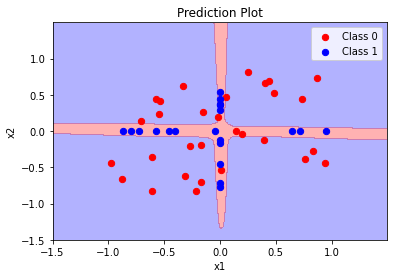

In [90]:
prediction_network = [[{'weights': [1.2893931743638098, 61.869879977371916, -6.383721600387217]}, {'weights': [46.51977791643853, 1.6604902284909009, 1.310631610085361]}, {'weights': [1.4188044972179554, 41.07374352447294, 3.796241914134656]}, {'weights': [67.36558990008774, -1.2486107632312449, -3.9939112394638085]}], [{'weights': [24.81231545982071, -25.38430295803592, -9.814473563376684, 27.55096748006135, 5.533515796362818]}, {'weights': [-24.81241155567652, 25.384407974480382, 9.814508904091506, -27.551079784024367, -5.5335414838014865]}]]
plotting(test_dataset,prediction_network, title = "Prediction Plot")

In [84]:


# rand.seed(1)
# input_dataset = expanded_data1
# input_dataset = training_dataset_expanded
input_dataset = data1
number_of_inputs = len(input_dataset[0]) - 1

number_of_outputs = len(set([x[-1] for x in input_dataset]))

network = create_network(n_inputs, 1, [4] , n_outputs)


network_4_neurons =  [[{'weights': [-0.9592563011978409, 14.786706148824658, -4.70046446583266]}, {'weights': [0.7673593727535573, 0.3685434829913632, 0.9572486431551711]}, {'weights': [0.055382569601113874, 0.964813054007715, 0.44590963589993826]}, {'weights': [0.8279780984770803,0.19282227643805672, 0.5041359264246169]}], [{'weights': [0.18592780528717245, 0.6300980308882045, 0.8275516186965673, 0.581243397370875, 0.411158347707138]}, {'weights': [0.024129688526639992, 0.9063010720675685, 0.5613600951334111, 0.022899930594609375, 0.44146418007664934]}]]

trained_10000_epoch_network = [[{'weights': [-0.9592563011978409, 14.786706148824658, -4.70046446583266]}, {'weights': [24.239787129483556, -0.07607190170847078, 4.03496481324339]}, {'weights': [0.32474503242357666, 32.11287764808236, 3.0821490712316764]}, {'weights': [31.805523981691188, 0.18425852730265568, -1.889651919738324]}], [{'weights': [11.528377483909567, -13.033110700624434, -13.29532893994785, 14.18828147971293, 6.776882877598519]}, {'weights': [-11.528519071159739, 13.033275271867767, 13.2955026246674, -14.18847264132986, -6.776973161427623]}]]

trained_1000_epoch_network = [[{'weights': [-0.7621764006364317, 13.413159802195512, -4.205275583522489]}, {'weights': [21.399783490503765, -0.1459231768571693, 3.9502944765046233]}, {'weights': [0.26071688141565813, 28.353012964178795, 2.5259659073280694]}, {'weights': [22.76489662560973, 0.20763140581019643, -1.7934700058672997]}], [{'weights': [8.217085471783731, -8.90876832545036, -9.992744739662633, 9.971211949020903, 5.040115989257821]}, {'weights': [-8.218256402038454, 8.909878380203223, 9.99421872733163, -9.9727231560631, -5.040812974236946]}]]

print(network)

# training(trained_10000_epoch_network, input_dataset, 10000, 0.4, n_outputs, False, False)
# training(network_3_neurons, input_dataset, 1000, 0.4, n_outputs,3)
network = training(network_4_neurons, input_dataset, 10000, 0.4, n_outputs,False,4)

prediction_network = []
for layer in network:
    nodes = []
    for node in layer:
        nodes.append({'weights':node["weights"]})
    prediction_network.append(nodes)
    # print(layer)
print("prediction_network: ",prediction_network)


[[{'weights': [0.24221729528794378, 0.6771809282632386, 0.7930523657921612]}, {'weights': [0.19663873436113066, 0.8974233049462088, 0.2223100267146929]}, {'weights': [0.6654432160818825, 0.720050267727108, 0.39934612108014456]}, {'weights': [0.7125846007891222, 0.43287601467211256, 0.993194999653771]}], [{'weights': [0.16754995233492442, 0.721985441727073, 0.5567647563312352, 0.2847118505651326, 0.9282665543285304]}, {'weights': [0.47909313702515255, 0.7982180118648133, 0.12082545668697564, 0.0799996776909856, 0.9599999010332155]}]]
>epoch=9999, lrate=0.400, error=3.992
prediction_network:  [[{'weights': [-0.059910037931803356, 23.471521724367914, -6.350515005617183]}, {'weights': [-0.12177212459277978, 0.7584322964929586, 7.237431152306888]}, {'weights': [-0.1982606783290504, 0.9809608398445103, 7.603578673293758]}, {'weights': [0.010874232627998163, -1.0322213191154912, -7.912640617958855]}], [{'weights': [1.422616668332271, -0.3236386051049188, -0.37611622123353877, 0.83988246192642

In [82]:

##############Prediction code###################
error_11 = [[{'weights':[0.9555784318181922, 0.18889732434755435, 0.1590900538721557]}, {'weights': [0.456948998170152, 0.7197651640301019, 0.09581460203400993]}, {'weights': [0.9075776243329462, 0.44967938813058517, 0.40519587865902096]}, {'weights': [0.04544326043123781, 0.7397901955735666, 0.9553078480299734]}], [{'weights': [0.25383162139530036, 0.7749537350945601, 0.39397733883628316, 0.985938897298549, 0.33338226783505354]}, {'weights': [0.06892849404949364, 0.38244818624371324, 0.9699969449640526, 0.7727037641723559, 0.07514922707758631]}]]

trained_1000_epoch_network = [[{'weights': [-0.7621764006364317, 13.413159802195512, -4.205275583522489]}, {'weights': [21.399783490503765, -0.1459231768571693, 3.9502944765046233]}, {'weights': [0.26071688141565813, 28.353012964178795, 2.5259659073280694]}, {'weights': [22.76489662560973, 0.20763140581019643, -1.7934700058672997]}], [{'weights': [8.217085471783731, -8.90876832545036, -9.992744739662633, 9.971211949020903, 5.040115989257821]}, {'weights': [-8.218256402038454, 8.909878380203223, 9.99421872733163, -9.9727231560631, -5.040812974236946]}]]

trained_10000_epoch_network = [[{'weights': [-0.9592563011978409, 14.786706148824658, -4.70046446583266]}, {'weights': [24.239787129483556, -0.07607190170847078, 4.03496481324339]}, {'weights': [0.32474503242357666, 32.11287764808236, 3.0821490712316764]}, {'weights': [31.805523981691188, 0.18425852730265568, -1.889651919738324]}], [{'weights': [11.528377483909567, -13.033110700624434, -13.29532893994785, 14.18828147971293, 6.776882877598519]}, {'weights': [-11.528519071159739, 13.033275271867767, 13.2955026246674, -14.18847264132986, -6.776973161427623]}]]


# prediction_network = trained_10000_epoch_network


test_correct = 0
# dataset_for_testing = training_dataset_expanded
dataset_for_testing = test_dataset
# dataset_for_testing = data1
# dataset_for_testing = expanded_data2

for row in dataset_for_testing:
    prediction = predict(prediction_network, row)
    if prediction==row[-1]:
        test_correct += 1   
    else:
        print(row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))
print("Validation_accuracy = ",(test_correct/len(dataset_for_testing)*100),"%")


[-0.6098969316156784, -0.35196752260187414, 0]
Expected=0, Got=1
[-0.7093891508634509, 0.1431255749492626, 0]
Expected=0, Got=1
[-0.21802907569726426, -0.8309098907575272, 0]
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
[0.1935192334278344, -0.03385171749689664, 0]
Expected=0, Got=1
Expected=0, Got=0
[-0.27194744750607547, -0.20772290785187164, 0]
Expected=0, Got=1
[0.3971522382401944, -0.12227491457832929, 0]
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=0
[-0.9794491616042837, -0.43689711957431254, 0]
Expected=0, Got=1
Expected=0, Got=0
[0.011791415331936728, -0.5415767562264067, 0]
Expected=0, Got=1
Expected=0, Got=0
[-0.6093557659740099, -0.8198408501699734, 0]
Expected=0, Got=1
[0.8306601988518456, -0.27120314589291383, 0]
Expected=0, Got=1
[-0.3170688086766147, -0.6147833456314409, 0]
Expected=0, Got=1
[-0.17017187633663378, -0.7031934040697609, 0]
Expected=0, Got=1
Expected=0, Got=0
[0.9447235184447009, -0.43779424218911767, 0]
Expected=0, Got=1


In [28]:
data1 = [   [1, 0, 1],
            [0, 1, 1],
            [-1, 0, 1],
            [0, -1, 1],
            [0.5, 0.5, 0],
            [-0.5, 0.5, 0],
            [0.5, -0.5, 0],
            [-0.5, -0.5, 0] ]



expanded_data1 = [ [1, 0, 1],
            [0, 1, 1],
            [-1, 0, 1],
            [0, -1, 1],
            [0.5, 0.5, 0],
            [-0.5, 0.5, 0],
            [0.5, -0.5, 0],
            [-0.5, -0.5, 0], [0.29198718574992766, -1.6032667310322744, 0], [1.7975175745445982, -0.3007978726390106, 0], [1.990713299656826, 1.471927676673514, 0], [-1.7834849867929625, 0.5962749170603341, 0], [1.679728726344937, -0.41584935042150306, 0], [-1.720734555762546, -1.5881860694659125, 0], [-0.632751125732272, -0.5875743077704514, 0], [-1.052561735122974, 0.5906483707684913, 0], [1.2772998308525887, -0.2279300413039369, 0], [0.1218535859374188, -0.6469143752494966, 0], [1.8918591912406773, 1.1109606547934123, 0], [-0.22765139454076522, -0.2278660329374924, 0], [0.7354651193415012, -1.0851018417258467, 0], [1.207985793395292, -0.3008354545376162, 0], [1.0677118143486317, 1.002131750716055, 0], [1.2727257713937359, -0.5549646790714458, 0], [1.9541832936696881, -0.9827653032495252, 0], [0.9887648307501409, 1.9500111004995788, 0], [-1.1078480497094798, -0.32780823751235344, 0], [0.3940242274664607, -1.2698967787546835, 0], [-1.0296503264900974, -0.7220814312366186, 0], [-1.0838373628370963, 0.5292598576199703, 0], [-1.464996112818635, 1.149404252646336, 0], [-1.8593156639466835, 1.784710885628058, 0], [0.08941526247706078, -0.1912639521116919, 0], [1.8356950146029045, -0.7003134276145841, 0], [-1.701608918211532, 0.5298846946954754, 0],[-1.4867115724143378, 0, 1], [0, 0.9463822333463572, 1], [-0.34987171113398263, 0, 1], [0, -0.010706133275174334, 1], [1.4311008573052448, 0, 1], [0, 0.20225067111949624, 1], [-0.5999220950372908, 0, 1], [0, -0.4180042894094007, 1], [-0.09439899842522692, 0, 1], [0, -1.4341143352097845, 1], [-0.5973053399143957, 0, 1], [0, 1.6296397087851635, 1], [0.06916982207355682, 0, 1], [0, 0.7318011617219731, 1], [-0.42455904804319644, 0, 1], [0, -0.19429635756004027, 1], [-1.1158424479685563, 0, 1], [0, -0.9612391410693033, 1], [0.6089481116334947, 0, 1], [0, 1.1760653313385685, 1], [-0.12012696057202055, 0, 1], [0, -1.122355439104862, 1], [-1.2584856589000446, 0, 1], [0, 0.3099622685212644, 1], [0.3220146876611585, 0, 1], [0, 1.3022754285910096, 1], [0.6042810146948439, 0, 1], [0, 0.7105800255779724, 1], [0.8292043527662121, 0, 1], [0, 1.9455273138133258, 1], [1.922686915493459, 0, 1], [0, 0.6430169336707783, 1], [-0.621227570411842, 0, 1], [0, 0.8555193055592785, 1], [0.1770568381811497, 0, 1], [0, -0.2390980147501809, 1], [1.3702888708066112, 0, 1], [0, -1.8730495226552408, 1], [-0.19854522670779984, 0, 1], [0, 1.820363675733775, 1]]

expanded_data2 = [ [1, 0, 1],
            [0, 1, 1],
            [-1, 0, 1],
            [0, -1, 1],
            [0.5, 0.5, 0],
            [-0.5, 0.5, 0],
            [0.5, -0.5, 0],
            [-0.5, -0.5, 0], [0.29198718574992766, -1.6032667310322744, 0], [1.7975175745445982, -0.3007978726390106, 0], [1.990713299656826, 1.471927676673514, 0], [-1.7834849867929625, 0.5962749170603341, 0], [1.679728726344937, -0.41584935042150306, 0], [-1.720734555762546, -1.5881860694659125, 0], [-0.632751125732272, -0.5875743077704514, 0], [-1.052561735122974, 0.5906483707684913, 0], [1.2772998308525887, -0.2279300413039369, 0], [0.1218535859374188, -0.6469143752494966, 0], [1.8918591912406773, 1.1109606547934123, 0], [-0.22765139454076522, -0.2278660329374924, 0], [0.7354651193415012, -1.0851018417258467, 0], [1.207985793395292, -0.3008354545376162, 0], [1.0677118143486317, 1.002131750716055, 0], [1.2727257713937359, -0.5549646790714458, 0], [1.9541832936696881, -0.9827653032495252, 0], [0.9887648307501409, 1.9500111004995788, 0], [-1.1078480497094798, -0.32780823751235344, 0], [0.3940242274664607, -1.2698967787546835, 0], [-1.0296503264900974, -0.7220814312366186, 0], [-1.0838373628370963, 0.5292598576199703, 0], [-1.464996112818635, 1.149404252646336, 0], [-1.8593156639466835, 1.784710885628058, 0], [0.08941526247706078, -0.1912639521116919, 0], [1.8356950146029045, -0.7003134276145841, 0], [-1.701608918211532, 0.5298846946954754, 0],[-1.4867115724143378, 0, 1], [0, 0.9463822333463572, 1], [-0.34987171113398263, 0, 1], [0, -0.010706133275174334, 1], [1.4311008573052448, 0, 1], [0, 0.20225067111949624, 1], [-0.5999220950372908, 0, 1], [0, -0.4180042894094007, 1], [-0.09439899842522692, 0, 1], [0, -1.4341143352097845, 1], [-0.5973053399143957, 0, 1], [0, 1.6296397087851635, 1], [0.06916982207355682, 0, 1], [0, 0.7318011617219731, 1], [-0.42455904804319644, 0, 1], [0, -0.19429635756004027, 1], [-1.1158424479685563, 0, 1], [0, -0.9612391410693033, 1], [0.6089481116334947, 0, 1], [0, 1.1760653313385685, 1], [-0.12012696057202055, 0, 1], [0, -1.122355439104862, 1], [-1.2584856589000446, 0, 1], [0, 0.3099622685212644, 1], [0.3220146876611585, 0, 1], [0, 1.3022754285910096, 1], [0.6042810146948439, 0, 1], [0, 0.7105800255779724, 1], [0.8292043527662121, 0, 1], [0, 1.9455273138133258, 1], [1.922686915493459, 0, 1], [0, 0.6430169336707783, 1], [-0.621227570411842, 0, 1], [0, 0.8555193055592785, 1], [0.1770568381811497, 0, 1], [0, -0.2390980147501809, 1], [1.3702888708066112, 0, 1], [0, -1.8730495226552408, 1], [-0.19854522670779984, 0, 1], [0, 1.820363675733775, 1],[1.6893880055502133, -0.10262954678727709, 0], [1.0653943048513166, 0.16565954505370073, 0], [0.6116051917122187, -0.24629379888097325, 0], [0.41877034726612417, -0.2130273717873733, 0], [0.8209829647184255, -0.0378866332464749, 0], [0.6571361241010272, 0.46303280057083007, 0], [0.6846146339140842, -0.28969105387368277, 0], [1.988580439827507, -0.3149887561928967, 0], [1.8018294364426741, -0.3009063615952059, 0], [0.12035757165679217, 0.2916296354047858, 0], [1.3240542125217953, -0.041941546214399716, 0], [1.3045621995922951, 0.19088530063634512, 0], [1.2567078556125115, -0.4522198481257178, 0], [0.749801985219797, 0.4731940822066162, 0], [0.5235696123868978, 0.4323885817598644, 0], [0.8880593358219646, -0.2617344745123411, 0], [0.6254788639543605, -0.29570839266321947, 0], [0.08424278322558965, 0.1220470913196815, 0], [0.9961969021381039, -0.3221411504030731, 0], [1.131720893133093, 0.1756476546510466, 0], [0.07006168628001452, -0.473215784350824, 0], [0.23103635206396755, 0.24140696878488033, 0], [0.4486626142982675, -0.4935261766757514, 0], [1.1529999073425554, 0.3296716699100499, 0], [1.2982902213451122, -0.1776724079866604, 0], [1.7720052405687197, 0.23227021554017768, 0], [0.7541924685280417, -0.29613389264313694, 0], [1.3709646755815996, -0.2906529078566552, 0], [0.041970384917737524, -0.1173370129238851, 0], [0.3589490820704615, -0.08978822860876734, 0]]

training_dataset_expanded = [[1, 0, 1], [0, 1, 1], [-1, 0, 1], [0, -1, 1], [0.5, 0.5, 0], [-0.5, 0.5, 0], [0.5, -0.5, 0], [-0.5, -0.5, 0], [-0.1428184010985627, 0.256543871352656, 0], [-0.6055017606520186, -0.8519382697792959, 0], [0.14374747236290797, 0.699895385487844, 0], [0.14257440256747245, -0.10198940568098158, 0], [-0.24949273504131675, -0.772642103020166, 0], [-0.2013281428676914, -0.3742237472727483, 0], [-0.9966179304043437, -0.3518974136720767, 0], [0.5796020193772857, 0.6697503119403709, 0], [-0.3328619498891059, 0.09760996901061691, 0], [0.9794487794728348, 0.06137776895517244, 0], [-0.9961572506307057, -0.6253251599538081, 0], [0.06201932651114128, -0.9873180566561062, 0], [-0.33673139165081345, 0.5347644768966693, 0], [-0.9920920446326305, 0.38959271463394685, 0], [-0.8967331844370654, 0.23878039883153646, 0], [0.3143818768099391, -0.6867029465691099, 0], [0.4938647699646159, -0.39911375064805243, 0], [0.8938111341898625, 0.6953927109386311, 0], [0.14838037755194766, -0.9660906191496663, 0], [0.6237063999689274, 0, 1], [0, 0.9297762216739776, 1], [-0.7245280310496696, 0, 1], [0, 0.8667006598337079, 1], [-0.563087555121597, 0, 1], [0, 0.47722755869448075, 1], [0.40555274352143655, 0, 1], [0, -0.8415484882396218, 1], [-0.6496499292517388, 0, 1], [0, 0.4954101556237043, 1], [0.6936844042077936, 0, 1], [0, 0.13077650056233225, 1], [-0.8365589946121548, 0, 1], [0, 0.7161767261224663, 1], [0.9801503735054848, 0, 1], [0, 0.9179150305540758, 1], [0.6168422264465991, 0, 1], [0, -0.5278986545841191, 1], [0.19770667273608677, 0, 1], [0, 0.04584006288334752, 1],[0.05572982655382708, 0.47401592807198023, 0], [-0.6093557659740099, -0.8198408501699734, 0], [0.8306601988518456, -0.27120314589291383, 0], [-0.3170688086766147, -0.6147833456314409, 0], [-0.17017187633663378, -0.7031934040697609, 0], [-0.5481304435977541, 0.24253112732447835, 0], [0.9447235184447009, -0.43779424218911767, 0], [-0.014085294731122966, 0.1912367358631768, 0], [-0.17075620335415298, -0.18547523963864943, 0], [-0.8822666663238734, -0.6550676835719509, 0], [0.14362549494106847, -0.0014164447392273072, 0], [0.7338129828549731, 0.4452413632886598, 0], [0.486782506478584, 0.5212267567564595, 0], [0.7616241530866041, -0.3794895560318059, 0], [0.8711411225822563, 0.7340921941128382, 0]]

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

    
dataset_testing = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

matrix = [	[1.00,	0.08,	0.72,	1.0],
            [1.00,	0.10,	1.00,	0.0],
            [1.00,	0.26,	0.58,	1.0],
            [1.00,	0.35,	0.95,	0.0],
            [1.00,	0.45,	0.15,	1.0],
            [1.00,	0.60,	0.30,	1.0],
            [1.00,	0.70,	0.65,	0.0],
            [1.00,	0.92,	0.45,	0.0]]
bias = 1
data = [[1,0,-1,0,0,0.5,-0.5,0.5,-0.5],[0,1,0,-1,0,0.5,0.5,-0.5,-0.5],[1,1,1,1,1,0,0,0,0]]
weights = [ 0.3, -0.6]
# weights= [	 0.20,	1.00,  -1.00		]

In [182]:
training_dataset_expanded = []
print(len(expanded_data1))
for i in expanded_data1:
    if(i[0]<=1 and i[1]<=1):
        training_dataset_expanded.append(i)
print(len(training_dataset_expanded))
print(training_dataset_expanded)

75
54
[[1, 0, 1], [0, 1, 1], [-1, 0, 1], [0, -1, 1], [0.5, 0.5, 0], [-0.5, 0.5, 0], [0.5, -0.5, 0], [-0.5, -0.5, 0], [0.29198718574992766, -1.6032667310322744, 0], [-1.7834849867929625, 0.5962749170603341, 0], [-1.720734555762546, -1.5881860694659125, 0], [-0.632751125732272, -0.5875743077704514, 0], [-1.052561735122974, 0.5906483707684913, 0], [0.1218535859374188, -0.6469143752494966, 0], [-0.22765139454076522, -0.2278660329374924, 0], [0.7354651193415012, -1.0851018417258467, 0], [-1.1078480497094798, -0.32780823751235344, 0], [0.3940242274664607, -1.2698967787546835, 0], [-1.0296503264900974, -0.7220814312366186, 0], [-1.0838373628370963, 0.5292598576199703, 0], [0.08941526247706078, -0.1912639521116919, 0], [-1.701608918211532, 0.5298846946954754, 0], [-1.4867115724143378, 0, 1], [0, 0.9463822333463572, 1], [-0.34987171113398263, 0, 1], [0, -0.010706133275174334, 1], [0, 0.20225067111949624, 1], [-0.5999220950372908, 0, 1], [0, -0.4180042894094007, 1], [-0.09439899842522692, 0, 1],

[[-0.6098969316156784, -0.35196752260187414, 0], [-0.7093891508634509, 0.1431255749492626, 0], [-0.21802907569726426, -0.8309098907575272, 0], [0.40606138281020976, 0.6631977114054766, 0], [-0.5712002670134391, 0.44078253497173514, 0], [-0.3346123440227555, 0.6181895891211389, 0], [0.1935192334278344, -0.03385171749689664, 0], [0.2525769649710057, 0.8132805136566925, 0], [-0.27194744750607547, -0.20772290785187164, 0], [0.3971522382401944, -0.12227491457832929, 0], [-0.5398301129423508, 0.41782420888302996, 0], [0.4395496960596801, 0.6970321947562808, 0], [-0.9794491616042837, -0.43689711957431254, 0], [-0.15389405974995074, 0.2652129613671035, 0], [0.011791415331936728, -0.5415767562264067, 0], [0.05572982655382708, 0.47401592807198023, 0], [-0.6093557659740099, -0.8198408501699734, 0], [0.8306601988518456, -0.27120314589291383, 0], [-0.3170688086766147, -0.6147833456314409, 0], [-0.17017187633663378, -0.7031934040697609, 0], [-0.5481304435977541, 0.24253112732447835, 0], [0.944723518

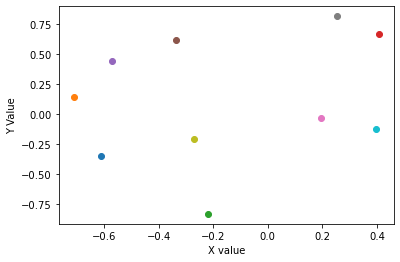

In [18]:
start = -1
stop = 1
number_of_test_points = 10
test_dataset = []
for i in range(3*number_of_test_points):
    # start = -2.0
    # stop = -1.0
    test_data_x = rand.uniform(start, stop)
    test_data_y = rand.uniform(start, stop)
    if test_data_x == 0 or test_data_y == 0:
        test_data_true = 1
    else:
        test_data_true = 0
    test_tuple = [test_data_x,test_data_y,test_data_true]
    test_dataset.append(test_tuple)

# for i in range(number_of_test_points):
#     start = -1.0
#     stop = 0.0
#     test_data_x = rand.uniform(start, stop)
#     test_data_y = rand.uniform(start, stop)
#     if test_data_x == 0 or test_data_y == 0:
#         test_data_true = 1
#     else:
#         test_data_true = 0
#     test_tuple = [test_data_x,test_data_y,test_data_true]
#     test_dataset.append(test_tuple)

# for i in range(number_of_test_points):
#     start = 0.0
#     stop = 1.0
#     test_data_x = rand.uniform(start, stop)
#     test_data_y = rand.uniform(start, stop)
#     if test_data_x == 0 or test_data_y == 0:
#         test_data_true = 1
#     else:
#         test_data_true = 0
#     test_tuple = [test_data_x,test_data_y,test_data_true]
#     test_dataset.append(test_tuple)

# for i in range(number_of_test_points):
#     start = 1.0
#     stop = 2.0
#     test_data_x = rand.uniform(start, stop)
#     test_data_y = rand.uniform(start, stop)
#     if test_data_x == 0 or test_data_y == 0:
#         test_data_true = 1
#     else:
#         test_data_true = 0
#     test_tuple = [test_data_x,test_data_y,test_data_true]
#     test_dataset.append(test_tuple)

for i in range(number_of_test_points):

    test_data_x = rand.uniform(start, stop)
    test_data_y = 0
    test_data_true = 1
    test_tuple = [test_data_x,test_data_y,test_data_true]
    test_dataset.append(test_tuple)
    test_data_y = rand.uniform(start, stop)
    test_data_x = 0
    test_data_true = 1
    test_tuple = [test_data_x,test_data_y,test_data_true]
    test_dataset.append(test_tuple)

print(test_dataset)
for i in range(number_of_test_points):
    plt.scatter(test_dataset[i][0],test_dataset[i][1])
    plt.xlabel("X value")
    plt.ylabel("Y Value")
# plt.show()


In [ ]:
between_neg_2and1 = 0
between_neg_1and0 = 0
between_pos_1and0 = 0
between_pos_1and2 = 0
print("Total points: ",len(test_dataset))
for i,row in enumerate(test_dataset):
    # if(-2<row[0]<-1 and -2<row[1]<-1):
    if(-2<row[0]<-1 ):
        between_neg_2and1 += 1
    # elif(-1<row[0]<0 and -1<row[1]<0):
    elif(-1<row[0]<=0 ):
        between_neg_1and0 += 1
    # elif(0<row[0]<1 and 0<row[1]<1):
    elif(0<row[0]<1):
        between_pos_1and0 += 1
    # elif(1<row[0]<2 and 1<row[1]<2):
    elif(1<row[0]<2):
        between_pos_1and2 += 1

print("between_neg_2and1 ",between_neg_2and1,"between_neg_1and0 ", between_neg_1and0,"between_pos_1and0 ", between_pos_1and0, "between_pos_1and2: ",between_pos_1and2, "")


In [ ]:
number_of_test_points = 30
extra_training_dataset = []
start_x = 0.0
stop_x = 2.0
start_y = -0.5
stop_y = 0.5

for i in range(number_of_test_points):
    
    extra_training_dataset_x = rand.uniform(start_x, stop_x)
    extra_training_dataset_y = rand.uniform(start_y, stop_y)
    if extra_training_dataset_x == 0 or extra_training_dataset_y == 0:
        extra_training_dataset_true = 1
    else:
        extra_training_dataset_true = 0
    extra_training_dataset_tuple = [extra_training_dataset_x,extra_training_dataset_y,extra_training_dataset_true]
    extra_training_dataset.append(extra_training_dataset_tuple)

# for i in range(number_of_test_points):
#     start = -2.0
#     stop = 2.0
#     extra_training_dataset_x = rand.uniform(start, stop)
#     extra_training_dataset_y = 0
#     extra_training_dataset_true = 1
#     extra_training_dataset_tuple = [extra_training_dataset_x,extra_training_dataset_y,extra_training_dataset_true]
#     extra_training_dataset.append(extra_training_dataset_tuple)
#     extra_training_dataset_y = rand.uniform(start, stop)
#     extra_training_dataset_x = 0
#     extra_training_dataset_true = 1
#     extra_training_dataset_tuple = [extra_training_dataset_x,extra_training_dataset_y,extra_training_dataset_true]
#     extra_training_dataset.append(extra_training_dataset_tuple)

print(extra_training_dataset)

In [ ]:
# data[1]
# plt.plot(data[0],data[1],'o',color = 'black')
# plt.scatter(data1[:][0],data1[:][1],c = data1[:][2])
plt.scatter(data[0],data[1],c = data[2])
plt.xlabel("X value")
plt.ylabel("Y Value")
plt.show()
# plt.plot(data1,'o',color = 'black')